# Aufgabe 5.1

Mit folgender Simulationsaufgabe sollen Sie mit dem Normalplot vertraut werden.

**a) Simulieren Sie n = 10, 20, 50 und 100 (standard-) normalverteilte Zufallszahlen und betrachten Sie die jeweilige Folge mit einem Normalplot.**

Wiederholen Sie diese Simulationen einige Male, bis Sie abschätzen können, wie weit zufällige Abweichungen von einer Geraden im Normalplot üblich sind.

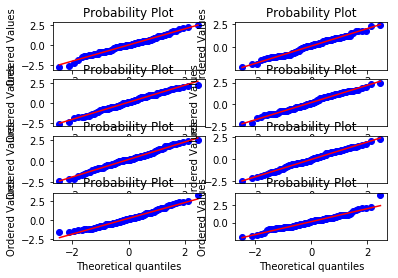

In [120]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
%matplotlib inline

#n = 10
#n = 20
#n = 50 
n = 100

for i in np.arange(1,9):
    x = st.norm.rvs(size=n)
    st.probplot(x,plot=plt.subplot(420+i))

#plt.tight_layout()
plt.show()

**b) _Langschwänzige Verteilung_: Simulieren Sie je $n = 20$ und $100$ t-verteilte Zufallszahlen mit $n = 20$, $7$ und $3$ Freiheitsgraden. Wiederholen Sie diese Simulationen einige Male, bis Sie abschätzen können, wie gross Abweichungen von einer Geraden im Normalplot üblich sind.**

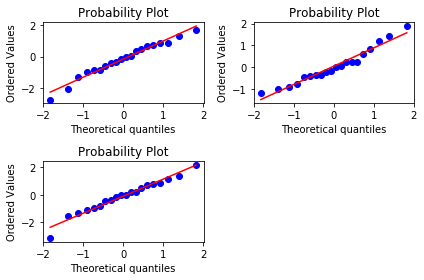

In [102]:
df = [20,7,3]
n = 20

for i,v in enumerate(df,start=1):
    x = st.t.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))

plt.tight_layout()
plt.show()

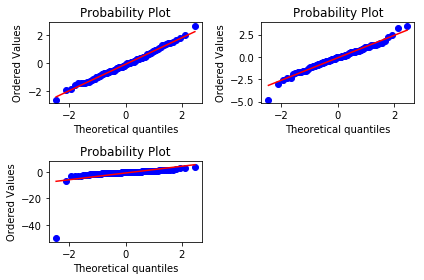

In [101]:
df = [20,7,3]
n = 100

for i,v in enumerate(df,start=1):
    x = st.t.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))

plt.tight_layout()
plt.show()

**_Schiefe Verteilung_: Simulieren Sie je $n = 20$ und $100$ chiquadrat-verteilte Zufallszahlen mit $v = 20$ und $1$ Freiheitsgraden. Wiederholen Sie diese Simulationen einige Male, bis Sie abschätzen können, wie gross Abweichungen von einer Geraden im Normalplot üblich sind.**

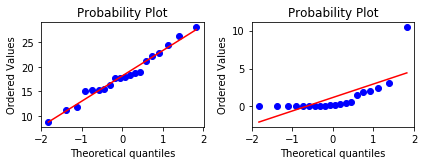

In [99]:
df = [20,1]
n = 20

for i,v in enumerate(df,start=1):
    x = st.chi2.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))
    
plt.tight_layout()
plt.show()

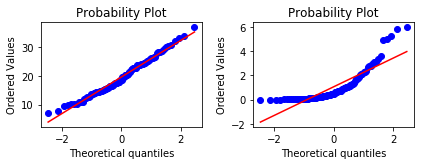

In [100]:
df = [20,1]
n = 100

for i,v in enumerate(df,start=1):
    x = st.chi2.rvs(size=n, df=v)
    st.probplot(x,plot=plt.subplot(220+i))
    
plt.tight_layout()
plt.show()

# Aufgabe 5.2

In dieser Aufgabe untersuchen Sie die Wirkung des Zentralen Grenzwertsatzes mittels Simulation. Gehen Sie von einer Zufallsvariablen $X$ aus, die folgendermassen verteilt ist: die Werte 0, 10 und 11 werden je mit einer Wahrscheinlichkeit $\frac{1}{3}$ angenommen.

Simulieren Sie nun die Verteilung von $X$ sowie die Verteilung des Mittelwerts $\overline{X}_n$ von mehreren $X$.

**a) Simulieren Sie $X$. Stellen Sie die Verteilung von $X$ mittels eines Histogramms von $1000$ Realisierungen von $X$ dar, und vergleichen Sie sie mittels des Normalplots mit der Normalverteilung.**

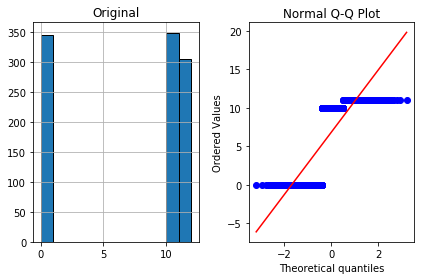

In [98]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import Series, DataFrame
import scipy.stats as st

werte = np.array([0,10,11])
sim = Series(np.random.choice(werte, size=1000, replace=True))


plt.subplot(121)
sim.hist(bins=[0,1,10,11,12],edgecolor="black")
plt.title("Original")

plt.subplot(122)
st.probplot(sim,plot=plt)
plt.title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

**b) Simulieren Sie nun $\overline{X}_5 = \frac{X_1+X_2+X_3+X_4+X_5}{5}$, wobei die $X_i$ die gleiche Verteilung haben wie $X$ und unabhängig sind. 
Stellen Sie die Verteilung von $\bar{X_5}$ anhand von $1000$ Realisierungen von $\bar{X_5}$ dar, und vergleichen Sie mit der Normalverteilung.**

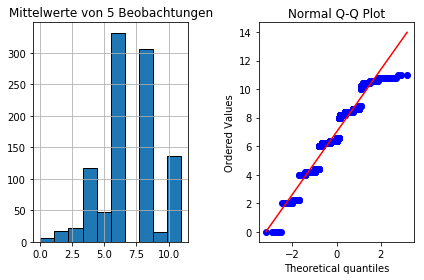

In [97]:
n = 5
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

**c) Simulieren Sie nun die Verteilung von $\bar{X}_n$ auch für die Fälle, wo $\bar{X}_n$ das Mittel von $n = 10$ resp. $n = 200$ $X_i$ ist.**

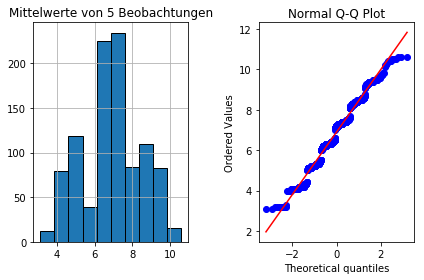

In [96]:
n = 10
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.tight_layout()
plt.show()

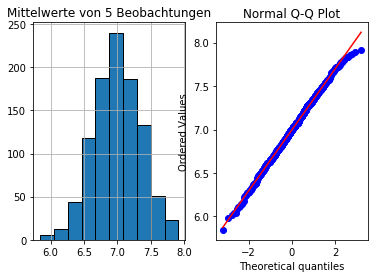

In [67]:
n = 200
sim = np.random.choice(werte, size=n*1000, replace=True)
sim = DataFrame(np.reshape(sim,(n,1000)))
sim_mean = sim.mean()


plt.subplot(1,2,1)
sim_mean.hist(edgecolor="black")
plt.title("Mittelwerte von 5 Beobachtungen")

plt.subplot(1,2,2)
st.probplot(sim_mean,plot=plt)
plt.title("Normal Q-Q Plot")

plt.show()

**d) Geben Sie die Verteilung von $\bar{X}_200$ an, zusammen mit den Werten der Verteilungsparameter.**

$X \sim \mathcal{N}(\mu,\,\sigma^{2})$

Der Erwarungswert $\hat{\mu} = \widehat{E(X)} = \bar{x}$,  entspricht also dem Durchschnitt:

In [69]:
sim_mean.mean()

6.99649

Die Varianz ergibt sich aus:

In [137]:
6.99**2

48.8601

# Aufgabe 5.3

In einer Studie wurde untersucht, wie bei Mäusen die Aufnahme von Eisen ($Fe^3+$) von der Dosis abhängt. Dazuwurden 54 Mäuse zufällig in 3 Gruppen zu je 18 Mäusen eingeteilt und jeweils mit Dosis hoch, mittel und tief gefüttert (hoch = 10.2millimolar, mittel=1.2 millimolar, tief=0.3 millimolar). Mittels radioaktiver Markierung wurde
der Anteil des zurückgehaltenen Eisens in Prozent nach einer gewissen Zeit bestimmt.

In [77]:
import pandas as pd

iron = pd.read_table("./data/ironF3.dat",sep=" ",index_col=False)

In [79]:
iron.describe()

,high,medium,low
count,18.000000,18.000000,18.00000
mean,3.698889,8.203889,11.75000
std,2.030870,5.447386,7.02815
min,0.710000,2.200000,2.25000
25%,2.420000,4.320000,6.10250
50%,3.475000,5.965000,9.98000
75%,4.472500,11.182500,15.99750
max,8.240000,18.590000,29.13000


**a) Erstellen Sie für jede der 3 Versuchsbedingungen einen Boxplot, am besten gerade nebeneinander. Wie unterscheiden sich die Daten der verschiedenen Versuchsbedingungen?**

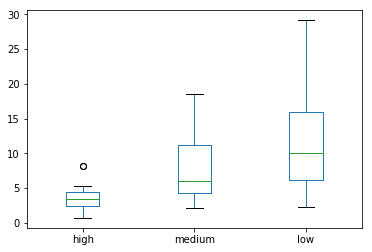

In [168]:
import matplotlib.pyplot as plt

iron.plot(kind="box")

**b) Transformieren Sie alle Wert emit dem Logarithmus und erstellen Sie wieder die 3 Boxplots wie bei Aufgabe a). Was hat sich durch die Transformation geändert?**

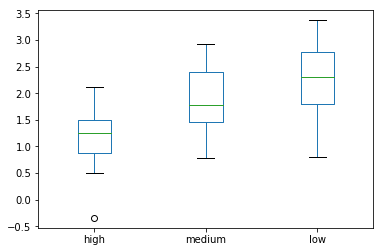

In [169]:
iron_log = np.log(iron)

iron_log.plot(kind="box")

**c) Erstellen Sie einen Normalplot der Daten bei mittlerer Dosis vor und nach dem Logarithmieren. Wann passt die Normalverteilung besser?**

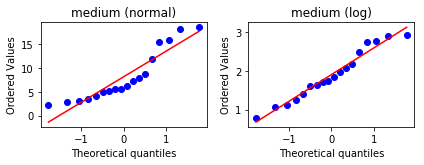

In [133]:
plt.subplot(2,2,1)
st.probplot(iron['medium'], plot=plt)
plt.title('medium (normal)')
plt.subplot(2,2,2)
st.probplot(iron_log['medium'], plot=plt)
plt.title('medium (log)')
plt.tight_layout()
plt.show()

Die Normalverteilung passt bei den transformierten Daten besser.

**d) Unter der Annahme, dass die Daten bei mittlerer Dosis normalverteilt sind,
schätzen Sie die Parameter $μ$ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit, dass eine Maus mehr als 10% Eisen zurückhält.**

$X \sim \mathcal{N}(\mu,\,\sigma^{2})$

Der Erwartungswert entspricht dem Druchschnitt, also: $\hat{\mu} = \bar{x}$

In [175]:
mean = iron.medium.mean()
print(mean)

8.20388888888889


In [176]:
var = iron.medium.var()
print(var)

29.674013398692814


In [177]:
# P(x > 10) = 1 - P(x < 10)
1 - st.norm.cdf(x=10, loc=mean, scale=np.sqrt(var))

0.37080583780045595

**e) (_Zusatzaufgabe_) Unter der Annahme, dass die Daten bei mittlerer Dosis log-normalverteilt sind, schätzen Sie die Parameter $μ$ und $\sigma^2$. Wie gross ist die Wahrscheinlichkeit,
dass eine Maus mehr als 10% Eisen zurückhält.**

_Hinweis: Ist $Y = log(X)$ normalverteilt ist, so heisst $X$ log-normalverteilt._

In [181]:
# TODO

# Aufgabe 5.4

Ein Statistiker beobachtet, dass ein Angler innerhalb von 2 Stunden 15 Fische fängt.
Er nimmt an, dass es sich um einen Poissonprozess handelt und überlegt sich:

**a) Mit welcher Wahrscheinlichkeit dauert es länger als 12 Minuten, bis der nächste Fisch anbeisst?**

_Hinweis: Benützen Sie die Momentenmethode, um Parameter zu schätzen._

Der geschätzte Erwartungswert enstpricht dem arithmetischen Mittel:
    
Wartezeit: $T \approx e^\lambda$ 


$$ \widehat{E(T)}=\overline{x} = \frac{1}{\lambda} = \frac{120}{15} = 8 $$

$$ \lambda = \frac{1}{8}$$

$$P(T > 12) = 1 - P(T < 12) $$

In [151]:
import scipy.stats as st
1 - st.expon.cdf(12, scale = 8)

0.2231301601484298

**b) Mit welcher Wahrscheinlichkeit beissen innerhalb der nächsten 12 Minuten genau 2 Fische an?**

In [155]:
# TODO

**c) Ein Fischer hat die Wartezeiten zwischen zwei Fischfängen aufgeschrieben. Erstellen
Sie einen QQ-Plot für die angegebenen Zeitdifferenzen. Tragen Sie dazu
die empirischen Quantile der Messungen gegen die theoretischen Quantile der Exp(1)-Verteilung auf. Passt die Exponentialverteilung zu den Messdaten? Bestimmen
Sie die Steigung der Regressionsgeraden im QQ-Plot. Was ist die Bedeutung
von der Steigung der Regressionsgeraden in diesem QQ-Plot? Schätzen
Sie aufgrund der Steigung den Parameter $\lambda$ der Exp($\lambda$)-Verteilung.**

<img src="./img/fish.png" alt="fish table" width="200"/>

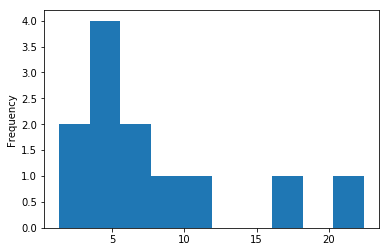

In [189]:
delta_min = pd.Series([16.9,4.2,6.7,8.83,10.7,22.4,1.37,3,4.82,4.53,6.77,4.81])
delta_min.plot(kind="hist")
plt.show()

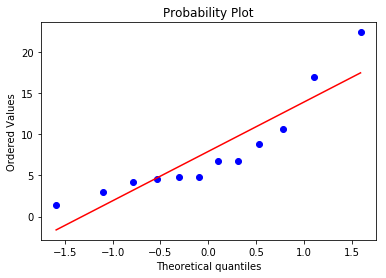

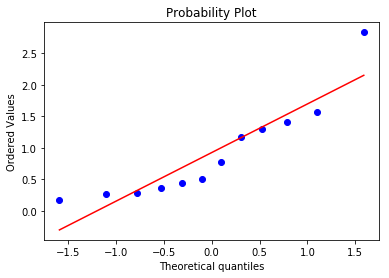

In [186]:
st.probplot(delta_min, plot = plt)
plt.show()
st.probplot(st.expon.rvs(size=delta_min.size), plot=plt)
plt.show()

In [185]:
delta_min.mean()

7.919166666666666